# Prerequisites: Linear regression

## Rainfall Prediction is the application of science and technology to predict the amount of rainfall over a region. It is important to exactly determine the rainfall for effective use of water resources, crop productivity and pre-planning of water structures.
---
### In this article, we will use Linear Regression to predict the amount of rainfall. Linear Regression tells us how many inches of rainfall we can expect.

### The dataset is a public weather dataset from Austin , Texas

### * Data Cleaning:

Data comes in all forms, most of it being very messy and unstructured. They rarely come ready to use. Datasets, large and small, come with a variety of issues- invalid fields, missing and additional values, and values that are in forms different from the one we require. In order to bring it to workable or structured form, we need to “clean” our data, and make it ready to use. Some common cleaning includes parsing, converting to one-hot, removing unnecessary data, etc.

In our case, our data has some days where some factors weren’t recorded. And the rainfall in cm was marked as T if there was trace precipitation. Our algorithm requires numbers, so we can’t work with alphabets popping up in our data. so we need to clean the data before applying it on our model

In [1]:
# importing libraries 
import pandas as pd 
import numpy as np 

# read the data in a pandas dataframe 
data = pd.read_csv("austin_weather.csv") 
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [2]:

# drop or delete the unnecessary columns in the data. 
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 
				'SeaLevelPressureLowInches'], axis = 1) 

# some values have 'T' which denotes trace rainfall 
# we need to replace all occurrences of T with 0 
# so that we can use the data in our model 
data = data.replace('T', 0.0) 

# the data also contains '-' which indicates no 
# or NIL. This means that data is not available 
# we need to replace these values as well. 
data = data.replace('-', 0.0) 

# save the data in a csv file 
data.to_csv('austin_final.csv') 


Once the data is cleaned, it can be used as an input to our Linear regression model. Linear regression is a linear approach to form a relationship between a dependent variable and many independent explanatory variables. This is done by plotting a line that fits our scatter plot the best, ie, with the least errors. This gives value predictions, ie, how much,  by substituting the independent values in the line equation.

We will use Scikit-learn’s linear regression model to train our dataset. Once the model is trained, we can give our own inputs for the various columns such as temperature, dew point, pressure, etc. to predict the weather based on these attributes.

In [3]:
# importing libraries 
import pandas as pd 
import numpy as np 
import sklearn as sk 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 

In [4]:
# read the cleaned data 
data = pd.read_csv("austin_final.csv") 
data.head()

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00


In [14]:
# the features or the 'x' values of the data 
# these columns are used to train the model 
# the last column, i.e, precipitation column 
# will serve as the label 
X = data.drop(['PrecipitationSumInches'], axis = 1) 

# the output or the label. 
Y = data['PrecipitationSumInches'] 
# reshaping it into a 2-D vector 
#Y = Y.values.reshape(-1, 1) 

In [15]:

# initialize a linear regression classifier 
clf = LinearRegression() 
# train the classifier with our 
# input data. 
clf.fit(X, Y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:

# give a sample input to test our model 
# this is a 2-D vector that contains values 
# for each column in the dataset. 
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45], 
				[57], [29.68], [10], [7], [2], [0], [20], [4], [31]]) 
inp = inp.reshape(1, -1) 

# print the output. 
print('The precipitation in inches for the input is:', clf.predict(inp)) 


The precipitation in inches for the input is: [1.33868402]


In [17]:
# consider a random day in the dataset 
# we shall plot a graph and observe this 
# day 
day_index = 798
days = [i for i in range(Y.size)] 


the precipitation trend graph: 


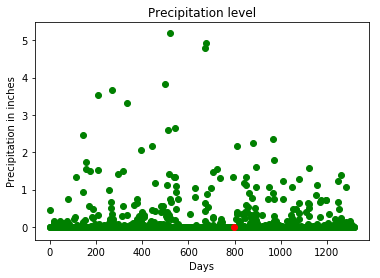

Precipitation vs selected attributes graph: 


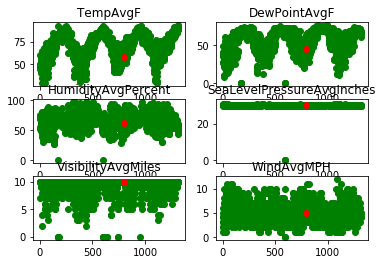

In [18]:
# plot a graph of the precipitation levels 
# versus the total number of days. 
# one day, which is in red, is 
# tracked here. It has a precipitation 
# of approx. 2 inches. 
print("the precipitation trend graph: ") 
plt.scatter(days, Y, color = 'g') 
plt.scatter(days[day_index], Y[day_index], color ='r') 
plt.title("Precipitation level") 
plt.xlabel("Days") 
plt.ylabel("Precipitation in inches") 


plt.show() 
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 
				'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 
				'WindAvgMPH'], axis = 1) 

# plot a graph with a few features (x values) 
# against the precipitation or rainfall to observe 
# the trends 

print("Precipitation vs selected attributes graph: ") 

for i in range(x_vis.columns.size): 
	plt.subplot(3, 2, i + 1) 
	plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], 
											color = 'g') 

	plt.scatter(days[day_index], 
				x_vis[x_vis.columns.values[i]][day_index], 
				color ='r') 

	plt.title(x_vis.columns.values[i]) 

plt.show() 


A day (in red) having precipitation of about 2 inches is tracked across multiple parameters 
(the same day is tracker across multiple features such as temperature, pressure, etc).
The x-axis denotes the days and the y-axis denotes the magnitude of the feature such as temperature, pressure, etc.
From the graph, it can be observed that rainfall can be expected to be high when the temperature is high and humidity is high.